In [1]:
from scipy.ndimage.filters import generic_filter
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
im = fits.getdata('/fastpool/data/pt-src-3-deg-field-iono.1000-restored.fits')

In [10]:
im = im[0][0]
im.shape

(36000, 36000)

In [38]:
im

array([[ 1.5431024e-06,  3.0603815e-07, -8.5043666e-07, ...,
         9.1386210e-06,  8.4276089e-06,  6.3494863e-06],
       [ 3.4906211e-06,  4.7804338e-06,  4.0517434e-06, ...,
         4.0910909e-06,  3.0853971e-06,  1.5939677e-06],
       [ 4.0306713e-06,  4.6024638e-06,  3.7531797e-06, ...,
         3.7116442e-06,  3.0402434e-06,  2.1601177e-06],
       ...,
       [-3.1024233e-06, -3.1929378e-06, -2.8979614e-06, ...,
         5.5150019e-07,  1.0836036e-06,  1.4714549e-06],
       [-2.6943769e-06, -3.1689824e-06, -2.9259086e-06, ...,
        -4.3405544e-07,  2.3579526e-07,  9.3142216e-07],
       [-2.1058504e-06, -2.9087041e-06, -2.5203249e-06, ...,
        -2.4979854e-06, -1.7961229e-06, -8.8049092e-07]], dtype=float32)

In [64]:
im_blocked = (im.reshape(360, im.shape[0]//360, -1, im.shape[0]//360)
               .swapaxes(1,2)
               .reshape(360, 360, -1))

In [57]:
im2 = im.reshape(im.shape[0]//360, 360, -1, 360).swapaxes(1,2)

In [58]:
im2[0].max()

1.3669755e-05

In [65]:
im_blocked.shape

(360, 360, 10000)

In [62]:
test = np.identity(8)

In [63]:
test.reshape(2, 4, 2, 4).swapaxes(1,2)

array([[[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]],


       [[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]]])

In [66]:
std_map = np.std(im_blocked, axis=-1)

Text(0, 0.5, 'Deg')

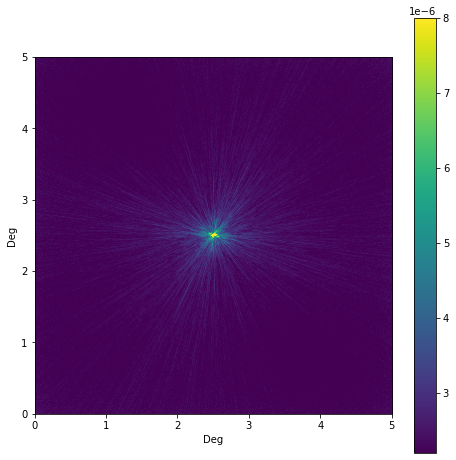

In [93]:
plt.figure(figsize=(8, 8))
plt.imshow(std_map, vmin=2.2e-6, vmax=8e-6, extent=[0, 5, 0, 5])
plt.colorbar()
plt.xlabel('Deg')
plt.ylabel('Deg')

In [69]:
from matplotlib.colors import LogNorm

Text(0, 0.5, 'Deg')

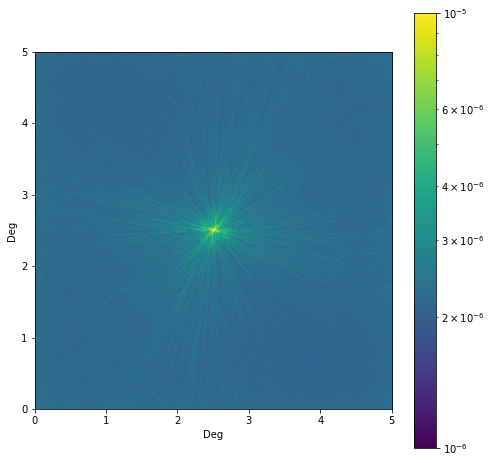

In [94]:
plt.figure(figsize=(8, 8))
plt.imshow(std_map, norm=LogNorm(vmin=1e-6, vmax=1e-5), extent=[0, 5, 0, 5])
plt.colorbar()
plt.xlabel('Deg')
plt.ylabel('Deg')

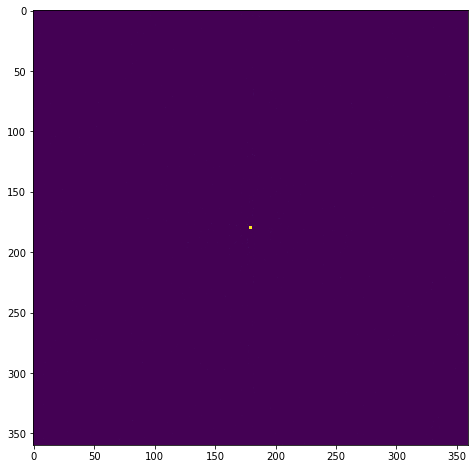

In [89]:
mean_map = np.mean(im_blocked, axis=-1)
plt.figure(figsize=(8, 8))
plt.imshow(mean_map, vmin=2.2e-7, vmax=1e-5)

In [92]:
np.abs(mean_map).min()

6.402843e-14